### Data Analysis

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("data/database/sample.json", 'r') as f:
    sample = json.load(f)

In [3]:
len(sample)

1000

In [4]:
for item in sample:
    for item in list(item.keys()):
        print(item)
    break

ID
age
gender
profession
interest
home_address
foreign_address
date_out
date_return
fund2invest
remittance
travell
social_work
personal_view


In [5]:
DF = pd.DataFrame(sample)

In [6]:
DF = DF.set_index('ID')

In [7]:
DF.head(3)

,age,date_out,date_return,foreign_address,fund2invest,gender,home_address,interest,personal_view,profession,remittance,social_work,travell
ID,,,,,,,,,,,,,
3LJJB6B924,29,2014.9.21,2022.3.16,"{'country': 'Costa-Rica', 'ID': 'CR', 'lat': '...","{'invetsment sector': '3%', 'tourism and hospi...",female,"{'province': 'PN6', 'district': 'Jajarkot', 'M...",art,[Kathmandu Metropolitan City’s undying infatua...,"{'major': 'Life, Physical, and Social Science ...","[{'month': 4, 'amount': 981}, {'month': 11, 'a...","[{'date': '2015.4.2', 'work': 'work against hu...","[{'date': '2017.5.8', 'place': {'country': 'Mo..."
5S5MI9J6K4,44,2011.10.26,2020.3.15,"{'country': 'Cook-Islands', 'ID': 'CK', 'lat':...","{'invetsment sector': '10%', 'tourism and hosp...",female,"{'province': 'PN1', 'district': 'Sunsari', 'MC...",novel,"[Granted, these initiatives are nothing new—th...","{'major': 'Military Specific Occupations', 'br...","[{'month': 11, 'amount': 962}, {'month': 10, '...","[{'date': '2005.1.3', 'work': 'resolving the c...","[{'date': '2010.4.11', 'place': {'country': 'V..."
3CO6495O5G,38,2016.8.27,2023.10.13,"{'country': 'Kenya', 'ID': 'KE', 'lat': '-0.02...","{'invetsment sector': '6%', 'tourism and hospi...",female,"{'province': 'PN1', 'district': 'Solukhumbu', ...",music,"[In response to the pressure, Parliament devis...","{'major': 'Installation, Maintenance, and Repa...","[{'month': 4, 'amount': 306}, {'month': 8, 'am...","[{'date': '2017.9.13', 'work': 'work against h...","[{'date': '2010.10.19', 'place': {'country': '..."


### Data Processing

1. Drop views
2. Seperate home address [PN,District,MCP,Ward]
3. Seperate Foreign address [country,lat,long,city]
4. Use lambda function $1000 = $1K
5. Create new column [month] with total month duration between data out-date return
6. 

#### Data Exploration

1. Age distribution ?
2. Gender and age - correlation?
3. County- gender ? Country- age ?
4. Histogram, bar-plot, ven-diagram ?

#### Data modeling - Machine lerning ( Scikit-learn)

1. Linear-regression, 
2. Classifier

#### Data Visualization ( matplotlib.pyplot, seaborn, Bokeh, plotly(Python-API)) (D3.JS, chart.js)

1. Plot generation

----------

In [8]:
Data = []
k = 0
for item in sample:
    #print(item.values()) 
    ID = item['ID']
    age = item['age']
    gender = item['gender']
    country = item['foreign_address']['country']
    province = item['home_address']['province']
    district = item['home_address']['district']
    lat = item['foreign_address']['lat']
    lon = item['foreign_address']['lon']
    interest = item['interest']
    profession = item['profession']['branch']
    income = 0
    for t in item['remittance']:
        income = income+t['amount']
        
    
    Data.append({'ID': ID,\
                 "age":age,\
                 "gender":gender,\
                 "country": country,\
                 "lat": lat,\
                 "lon":lon,\
                 "province":province,\
                 "district": district,\
                 "interest": interest,\
                 "profession": profession,\
                 "income": income})
    

In [16]:
DF = pd.DataFrame(Data)
DF = DF.set_index("ID")
DF.head()

,age,country,district,gender,income,interest,lat,lon,profession,province
ID,,,,,,,,,,
3LJJB6B924,29,Costa-Rica,Jajarkot,female,3180,art,9.748917,-83.753428,Zoologists and Wildlife Biologists,PN6
5S5MI9J6K4,44,Cook-Islands,Sunsari,female,3410,novel,-21.236736,-159.777671,Military Enlisted Tactical Operations and Air/...,PN1
3CO6495O5G,38,Kenya,Solukhumbu,female,2145,music,-0.023559,37.906193,"Maintenance and Repair Workers, General",PN1
K35G0P9M02,43,Venezuela,Palpa,male,2963,farming,6.42375,-66.58973,Tree Trimmers and Pruners,PN5
5X85I310N0,41,Malta,Terhathum,female,2735,stocks,35.937496,14.375416,Fallers,PN1


In [18]:
Country = DF.groupby('country').count()["age"]
Country

country
Afghanistan                  2
Albania                      6
Algeria                      3
American-Samoa               2
Andorra                      6
Angola                       5
Anguilla                     7
Antarctica                   8
Antigua-and-Barbuda          3
Argentina                    2
Armenia                      5
Aruba                        7
Australia                    7
Austria                      5
Azerbaijan                   6
Bahamas                      7
Bahrain                      5
Bangladesh                   6
Barbados                     4
Belarus                      3
Belgium                      1
Belize                      13
Benin                        6
Bermuda                      3
Bhutan                       4
Bolivia                      5
Bosnia-and-Herzegovina       5
Botswana                     6
Bouvet-Island                6
Brazil                       4
                            ..
Tajikistan                   2


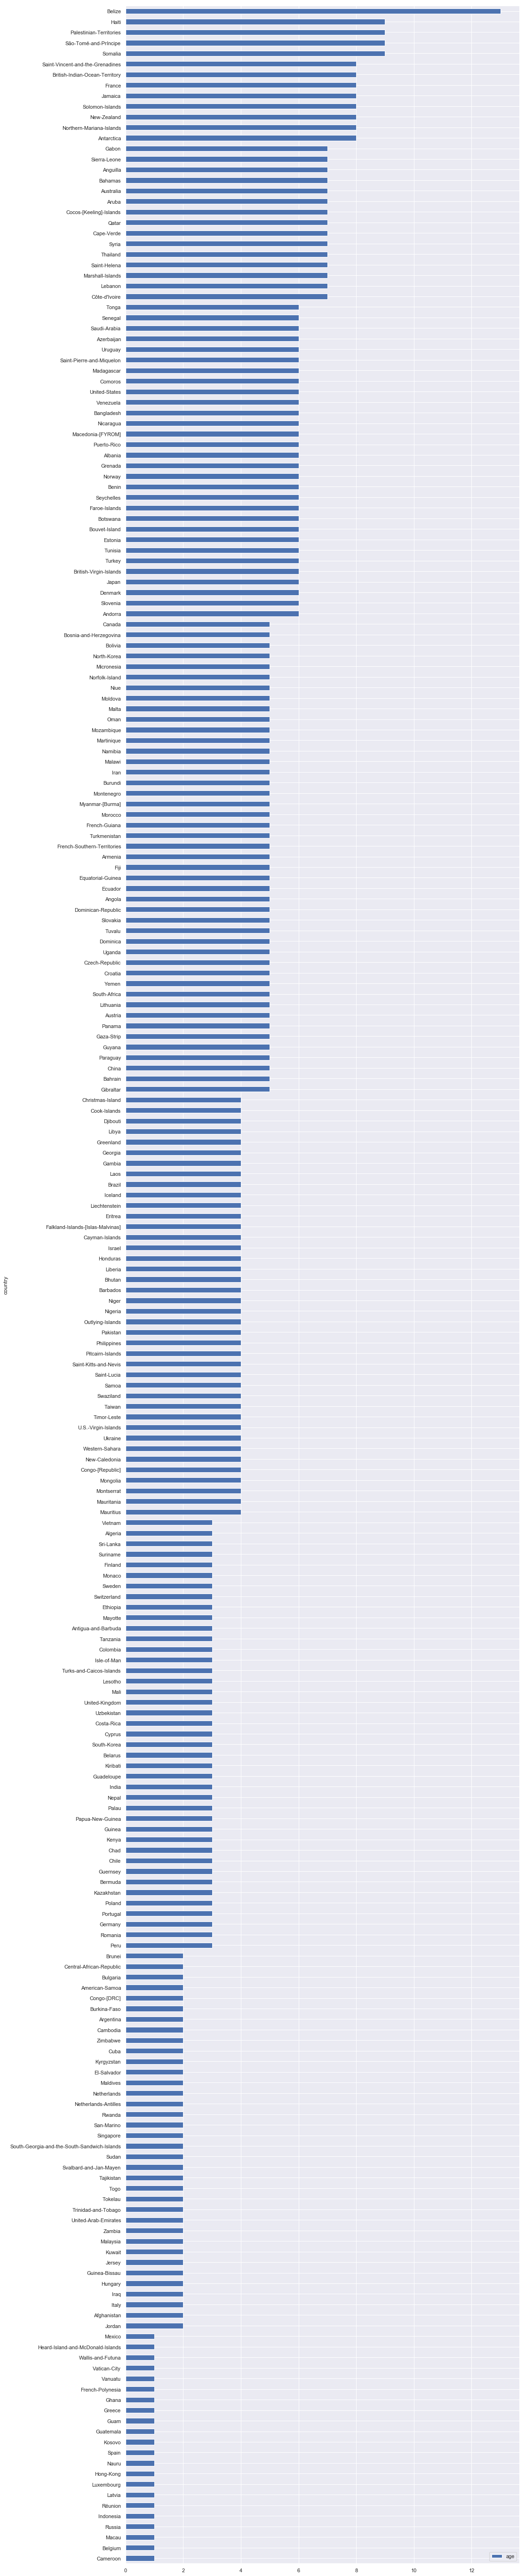

In [20]:
%matplotlib inline
sns.set()
Country = DF.groupby('country').count()['age']
df = pd.DataFrame(Country)
df = df.sort_values('age')
df.plot.barh(figsize = [15,100])

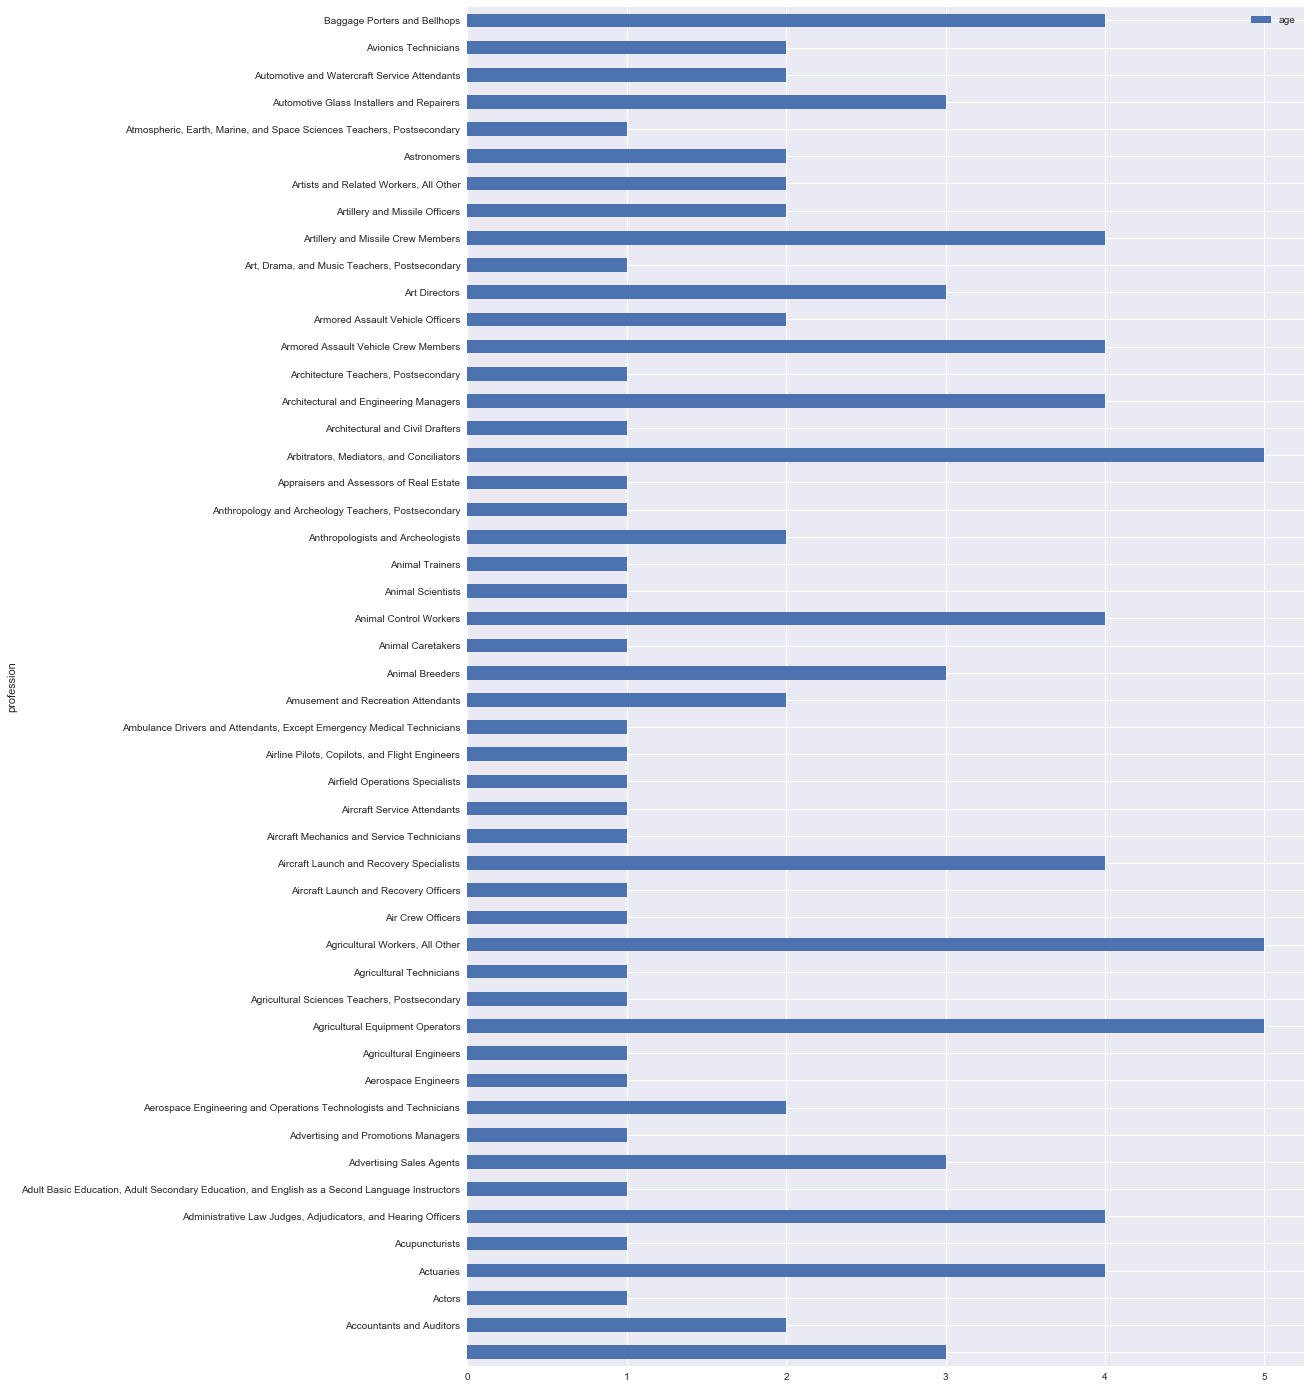

In [12]:
%matplotlib inline
sns.set()
P = DF.groupby('profession').count()['age']
df = pd.DataFrame(P)
#df = df.sort_values('age')
df[0:50].plot.barh(figsize = [15,25])

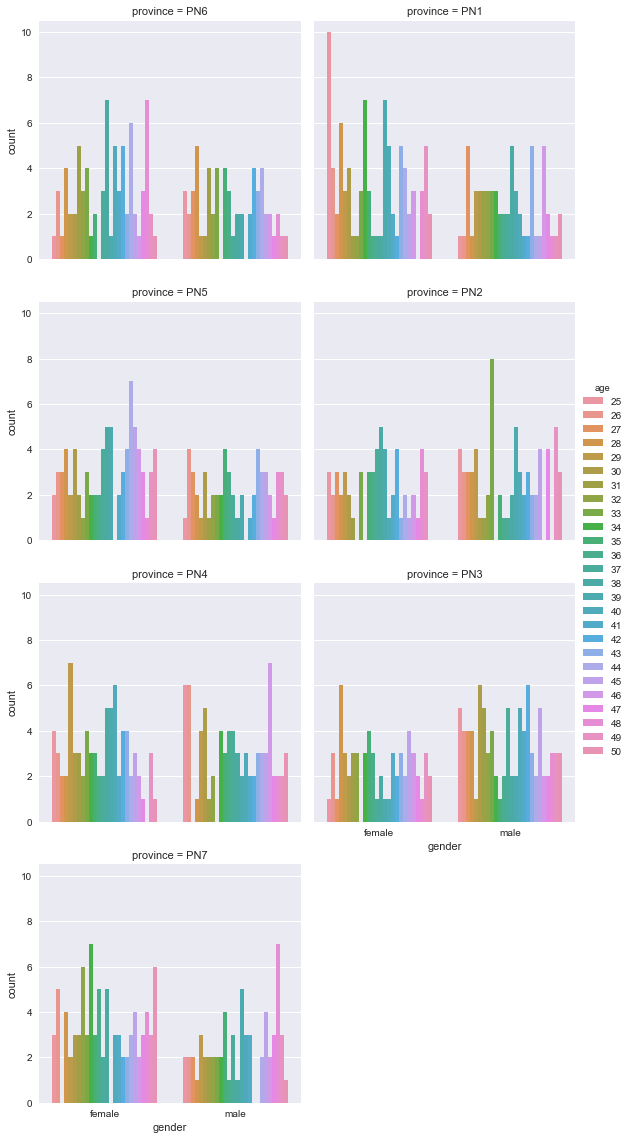

In [13]:
plt.figure(figsize = (16,21))
sns.set(color_codes=True)
sns.factorplot("gender", col="province", data=DF, 
               hue='age', kind="count", col_wrap=2);

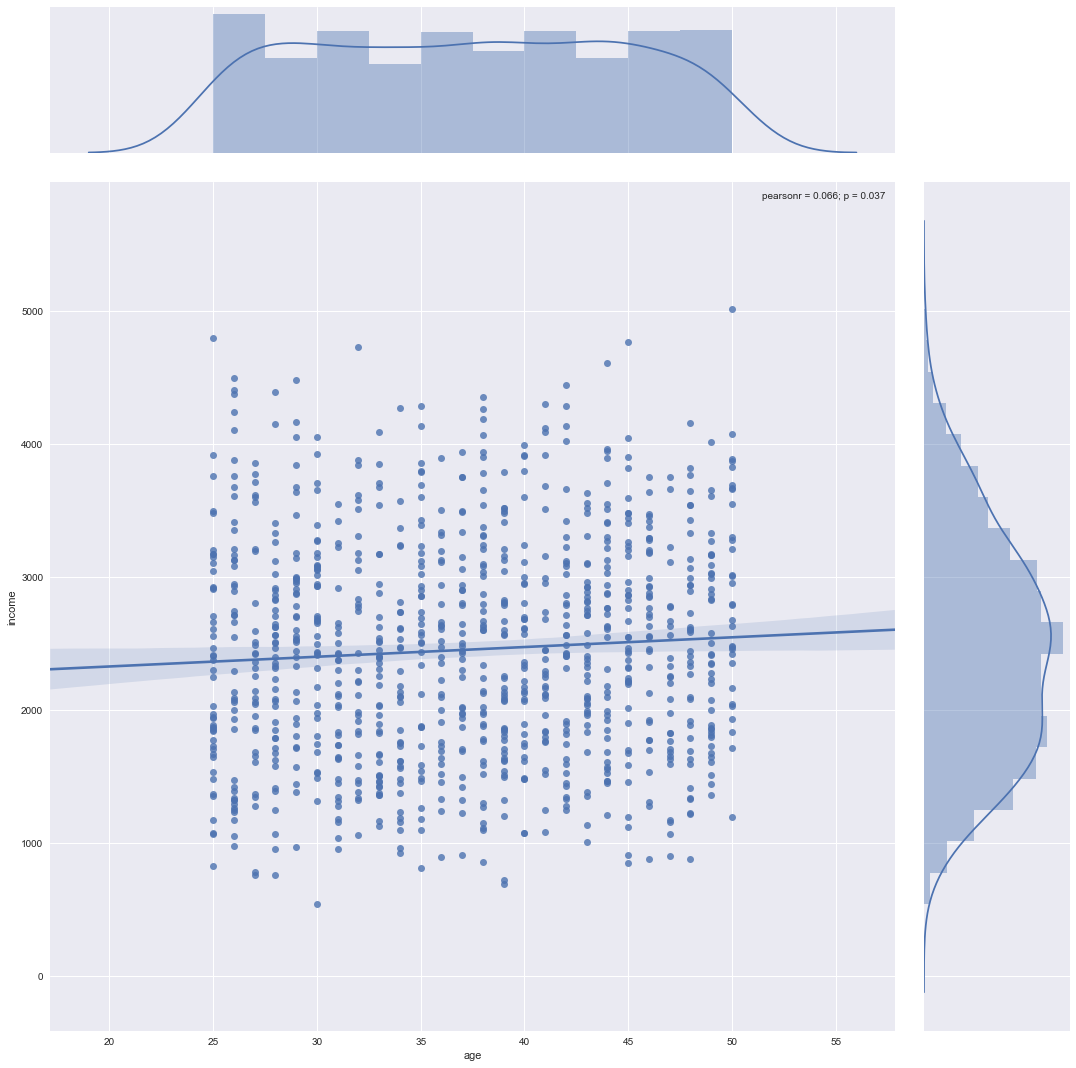

In [14]:
plt.figure(figsize = (15,21))
sns.jointplot(x="age", y="income", data=DF,size=15,kind = 'reg');